# Import Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import os
import os.path as ops
import time

In [2]:
# image_dir = "data/input_images/test_image/"
image_dir = "data/training_data/train/gt_image/"
image_list = os.listdir(image_dir)

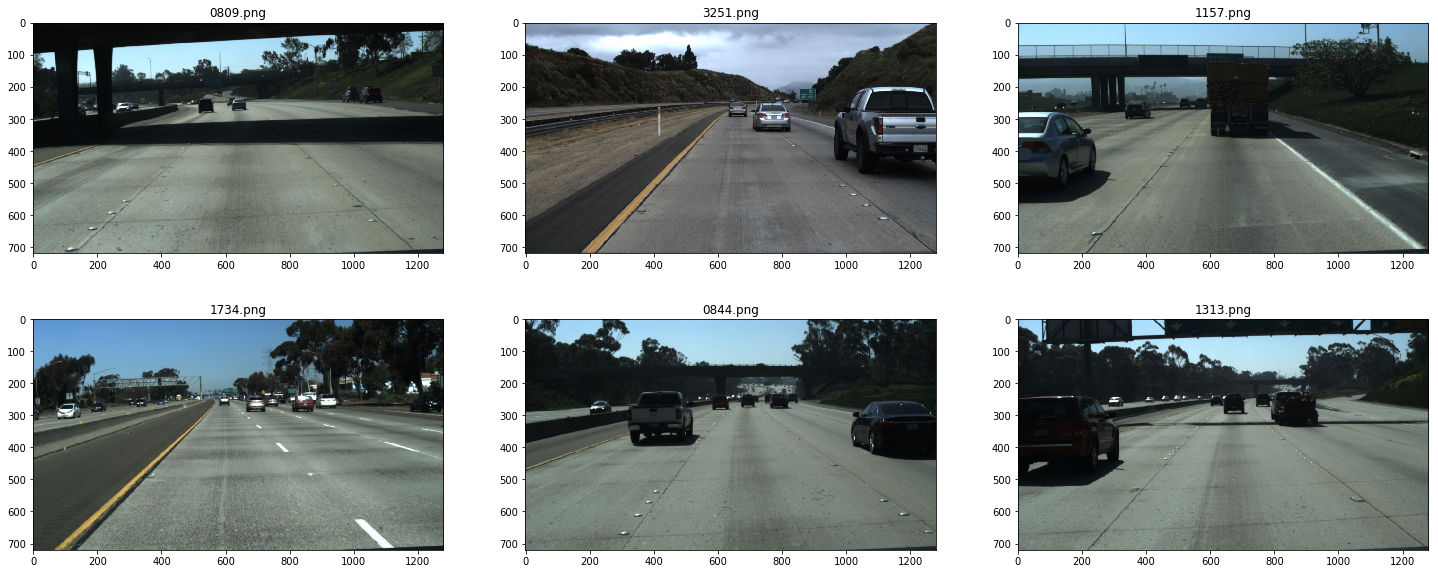

In [3]:
def show_image(i, image, cmap=None):
    if i == 0:
        fig=plt.figure(figsize=(25,10))
    plt.subplot(2, 3, i+1)
    plt.title(image_list[i])
    plt.imshow(image, cmap=cmap)

for i in range(6):
    image = mpimg.imread(image_dir + image_list[i])
    show_image(i, image)

In [4]:
def add_gamma(image, gamma=0.4):
    if image.dtype=='float32':
        image = (image*255).astype(np.uint8)

    gamma_cvt = np.zeros((256,1),dtype = 'uint8')

    for i in range(256):
        gamma_cvt[i][0] = 255 * (float(i)/255) ** (1.0/gamma)

    image_gamma = cv2.LUT(image, gamma_cvt)
    
    return image_gamma

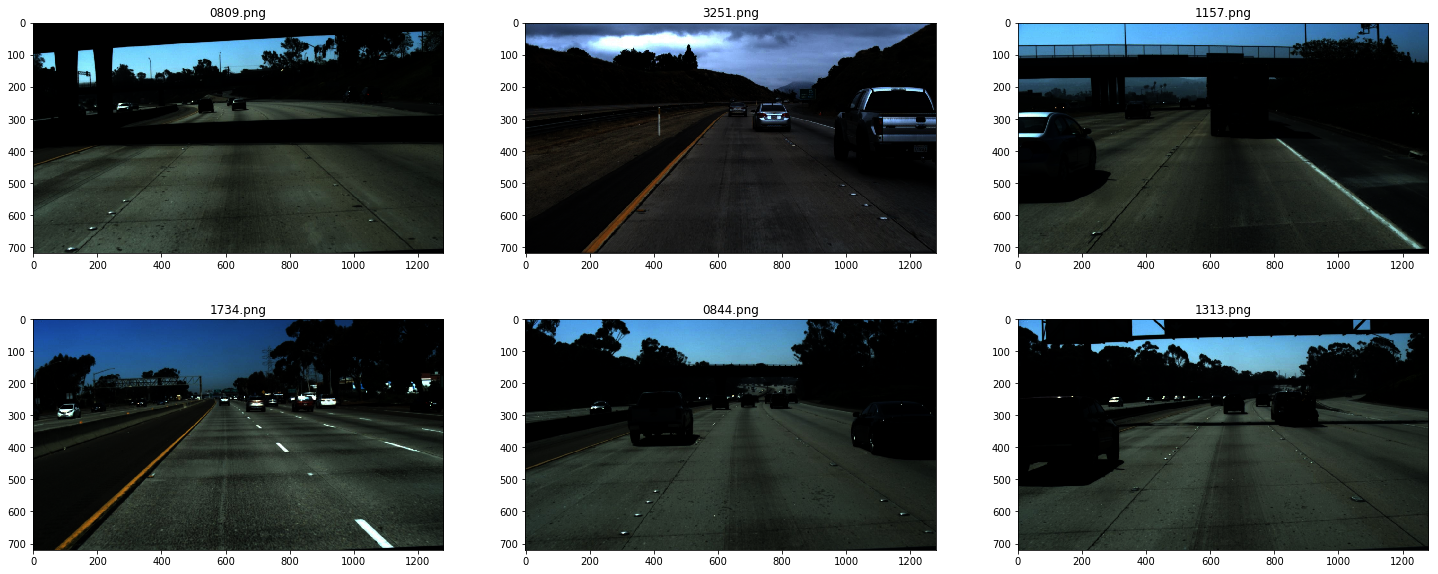

In [5]:
for i in range(6):
    image = mpimg.imread(image_dir + image_list[i])
    image_gamma = add_gamma(image)
    show_image(i, image_gamma)

In [6]:
# Set output image folder
image_save_path = 'data/training_data/train/gt_image_gamma_0d4/'
if not ops.exists(image_save_path):
    os.makedirs(image_save_path)

In [7]:
for i in range(len(image_list)):
    image = mpimg.imread(image_dir + image_list[i])
    image_gamma = add_gamma(image)
    
    imwrite_path = image_save_path + image_list[i]
    cv2.imwrite(imwrite_path, image_gamma[:, :, (2, 1, 0)])